In [ ]:
# ==========================================================================================
# NOTEBOOK 8 — Comparación de Modelos Temporales (LSTM vs ST-GNN vs T-GCN)
# ==========================================================================================
#
# OBJETIVO GENERAL
# ----------------
# Comparar tres enfoques de predicción temporal para el puntaje nacional del Saber 11:
#       (1) Modelo LSTM (Notebook 5)
#       (2) Modelo ST-GNN  (Notebook 6)
#       (3) Modelo T-GCN   (Notebook 7)
#
# Este notebook unifica los resultados y crea gráficas comparativas
# para evaluar su comportamiento predictivo en 2023–2026.
#
# ARCHIVOS NECESARIOS (generados automáticamente)
# ------------------------------------------------
# ✔ resultados/integracion/puntajes_nacionales_2015_2022.csv
# ✔ resultados/integracion/predicciones_lstm_2023_2026.csv
# ✔ resultados/modelos_temporales/predicciones_stgnn_2023_2026.csv   (Notebook 6)
# ✔ resultados/modelos_temporales/predicciones_tgcn_2023_2026.csv    (Notebook 7)
#
# SALIDAS DEL NOTEBOOK
# ---------------------
# • Tabla comparativa 2015–2026 (Real + LSTM + ST-GNN + T-GCN)
# • Gráfica interactiva comparativa con Plotly
# • Exportación de dataset final: 
#       resultados/comparacion/modelos_temporales_2015_2026.csv
#
# AUTOR
# -----
#   John Jairo Prado Piñeres — Proyecto Saber 11 (GNN + Series Temporales)
#
# ==========================================================================================

In [ ]:
# Cargar librerías

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

In [13]:
# Cargar rutas

In [21]:
# Directorios principales del proyecto
ruta_integracion      = r"C:/Users/john/Desktop/Saber_11_2025/resultados/integracion"
ruta_modelos_temp     = r"C:/Users/john/Desktop/Saber_11_2025/resultados/modelos_temporales"
ruta_salida_graficas  = r"C:/Users/john/Desktop/Saber_11_2025/resultados/graficas_comparacion"

# Crear carpeta de salida
os.makedirs(ruta_salida_graficas, exist_ok=True)

print("Rutas configuradas:")
print("Integración  :", ruta_integracion)
print("Modelos Temp :", ruta_modelos_temp)
print("Gráficas     :", ruta_salida_graficas)


Rutas configuradas:
Integración  : C:/Users/john/Desktop/Saber_11_2025/resultados/integracion
Modelos Temp : C:/Users/john/Desktop/Saber_11_2025/resultados/modelos_temporales
Gráficas     : C:/Users/john/Desktop/Saber_11_2025/resultados/graficas_comparacion


In [ ]:
# Se cargan los 4 elementos esenciales

In [22]:
# Se cargan los 4 elementos esenciales

file_real      = os.path.join(ruta_integracion, "puntajes_nacionales_2015_2022.csv")
file_lstm      = os.path.join(ruta_integracion, "predicciones_lstm_2023_2026.csv")
file_stgnn     = os.path.join(ruta_modelos_temp, "predicciones_stgnn_2023_2026.csv")
file_tgcn      = os.path.join(ruta_modelos_temp, "predicciones_tgcn_2023_2026.csv")

# Cargar archivos
df_real = pd.read_csv(file_real)
df_lstm = pd.read_csv(file_lstm)
df_stg  = pd.read_csv(file_stgnn)
df_tgc  = pd.read_csv(file_tgcn)

print("Datasets cargados con éxito:")
display(df_real.head())
display(df_lstm.head())
display(df_stg.head())
display(df_tgc.head())


Datasets cargados con éxito:


,ANIO,PUNTAJE_GLOBAL_PROMEDIO
0,2015,243.005971
1,2016,250.967215
2,2017,248.747612
3,2018,256.157674
4,2019,241.799973


,ANIO,PUNTAJE_PREDICHO
0,2023,259.5072
1,2024,261.9348
2,2025,253.7486
3,2026,253.7486


,ANIO,PUNTAJE_PRED_STGNN
0,2023,247.270844
1,2024,247.270844
2,2025,247.270844
3,2026,247.270844


,ANIO,PUNTAJE_PRED_TGCN
0,2023,249.955307
1,2024,249.955307
2,2025,249.955307
3,2026,249.955307


In [ ]:
# Preparar estructuras para unir

In [23]:
# Se normalizan los nombres y se añaden etiquetas

df_real = df_real.rename(columns={"PUNTAJE_GLOBAL_PROMEDIO": "VALOR"})
df_real["MODELO"] = "REAL"

df_lstm = df_lstm.rename(columns={"PUNTAJE_PREDICHO": "VALOR"})
df_lstm["MODELO"] = "LSTM"

df_stg = df_stg.rename(columns={"PUNTAJE_PRED_STGNN": "VALOR"})
df_stg["MODELO"] = "ST-GNN"

df_tgc = df_tgc.rename(columns={"PUNTAJE_PRED_TGCN": "VALOR"})
df_tgc["MODELO"] = "T-GCN"


In [ ]:
# Integración en un solo DataFrame

In [24]:
df_total = pd.concat([df_real, df_lstm, df_stg, df_tgc], ignore_index=True)
df_total = df_total.sort_values(["MODELO", "ANIO"]).reset_index(drop=True)

print("DATAFRAME UNIFICADO — 2015–2026")
display(df_total)


DATAFRAME UNIFICADO — 2015–2026


,ANIO,VALOR,MODELO
0,2023,259.507200,LSTM
1,2024,261.934800,LSTM
2,2025,253.748600,LSTM
3,2026,253.748600,LSTM
4,2015,243.005971,REAL
5,2016,250.967215,REAL
6,2017,248.747612,REAL
7,2018,256.157674,REAL
8,2019,241.799973,REAL
9,2020,269.514077,REAL


In [ ]:
# Gráfica comparativa (Plotly estilo NEÓN)

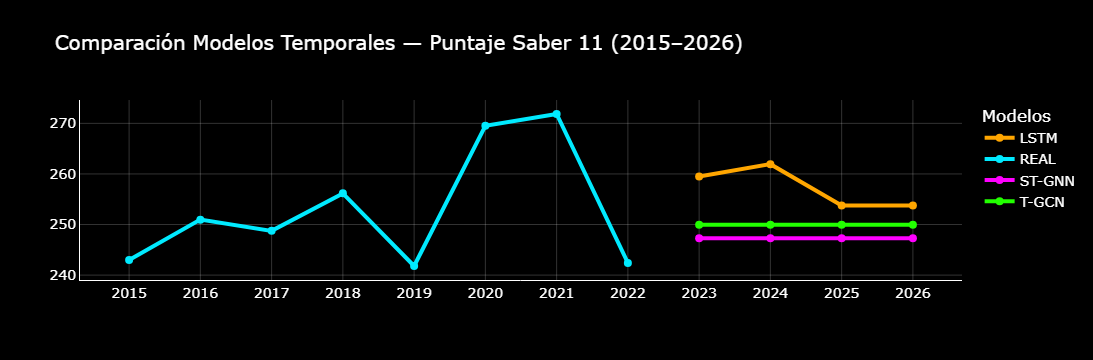

In [25]:
# Aquí se dibuja la línea comparativa completa

color_map = {
    "REAL":   "#00eaff",
    "LSTM":   "#ffa600",
    "ST-GNN": "#ff00ff",
    "T-GCN":  "#22ff00",
}

fig = go.Figure()

for modelo in df_total["MODELO"].unique():
    data = df_total[df_total["MODELO"] == modelo]

    fig.add_trace(go.Scatter(
        x=data["ANIO"],
        y=data["VALOR"],
        mode="lines+markers",
        name=modelo,
        line=dict(width=4, color=color_map[modelo]),
        marker=dict(size=8),
        hovertemplate="Año %{x}<br>Valor %{y:.2f}<extra>" + modelo + "</extra>"
    ))

fig.update_layout(
    title="Comparación Modelos Temporales — Puntaje Saber 11 (2015–2026)",
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="white", size=14),
    xaxis=dict(dtick=1, gridcolor="rgba(255,255,255,0.2)", linecolor="white"),
    yaxis=dict(gridcolor="rgba(255,255,255,0.2)", linecolor="white"),
    legend=dict(title="Modelos", font=dict(size=14))
)

fig.show()


In [ ]:
# TABLA DE DIFERENCIAS ENTRE MODELOS vs REAL

In [31]:
# TABLA DE DIFERENCIAS ENTRE MODELOS vs REAL

# Convertir df_total a formato wide (columnas: REAL, LSTM, ST-GNN, T-GCN)
df_wide = df_total.pivot(index="ANIO", columns="MODELO", values="VALOR").reset_index()

print("TABLA EN FORMATO WIDE (REAL + 3 MODELOS)")
display(df_wide)

# Crear columnas de diferencia (predicción - real)
df_wide["DIFF_LSTM"]  = df_wide["LSTM"]   - df_wide["REAL"]
df_wide["DIFF_STGNN"] = df_wide["ST-GNN"] - df_wide["REAL"]
df_wide["DIFF_TGCN"]  = df_wide["T-GCN"]  - df_wide["REAL"]

print("=== TABLA CON DIFERENCIAS ENTRE MODELOS Y REAL ===")
display(df_wide)


TABLA EN FORMATO WIDE (REAL + 3 MODELOS)


MODELO,ANIO,LSTM,REAL,ST-GNN,T-GCN
0,2015,NaN,243.005971,NaN,NaN
1,2016,NaN,250.967215,NaN,NaN
2,2017,NaN,248.747612,NaN,NaN
3,2018,NaN,256.157674,NaN,NaN
4,2019,NaN,241.799973,NaN,NaN
5,2020,NaN,269.514077,NaN,NaN
6,2021,NaN,271.848492,NaN,NaN
7,2022,NaN,242.407903,NaN,NaN
8,2023,259.5072,NaN,247.270844,249.955307
9,2024,261.9348,NaN,247.270844,249.955307


=== TABLA CON DIFERENCIAS ENTRE MODELOS Y REAL ===


MODELO,ANIO,LSTM,REAL,ST-GNN,T-GCN,DIFF_LSTM,DIFF_STGNN,DIFF_TGCN
0,2015,NaN,243.005971,NaN,NaN,NaN,NaN,NaN
1,2016,NaN,250.967215,NaN,NaN,NaN,NaN,NaN
2,2017,NaN,248.747612,NaN,NaN,NaN,NaN,NaN
3,2018,NaN,256.157674,NaN,NaN,NaN,NaN,NaN
4,2019,NaN,241.799973,NaN,NaN,NaN,NaN,NaN
5,2020,NaN,269.514077,NaN,NaN,NaN,NaN,NaN
6,2021,NaN,271.848492,NaN,NaN,NaN,NaN,NaN
7,2022,NaN,242.407903,NaN,NaN,NaN,NaN,NaN
8,2023,259.5072,NaN,247.270844,249.955307,NaN,NaN,NaN
9,2024,261.9348,NaN,247.270844,249.955307,NaN,NaN,NaN


In [ ]:
# Exportar el dataset (opcional)

In [32]:
# Exportar el dataset (opcional)
ruta_salida = r"C:/Users/john/Desktop/Saber_11_2025/resultados/comparacion"
os.makedirs(ruta_salida, exist_ok=True)

file_diff = os.path.join(ruta_salida, "diferencias_modelos_2015_2026.csv")
df_wide.to_csv(file_diff, index=False, encoding="utf-8-sig")

print("Archivo de diferencias exportado correctamente:")
print("", file_diff)


Archivo de diferencias exportado correctamente:
 C:/Users/john/Desktop/Saber_11_2025/resultados/comparacion\diferencias_modelos_2015_2026.csv


In [ ]:
# EXPORTAR DATASET UNIFICADO 2015–2026

In [27]:
# EXPORTAR DATASET UNIFICADO 2015–2026

ruta_salida = r"C:/Users/john/Desktop/Saber_11_2025/resultados/comparacion"
os.makedirs(ruta_salida, exist_ok=True)

file_unificado = os.path.join(ruta_salida, "modelos_temporales_2015_2026.csv")

df_total.to_csv(file_unificado, index=False, encoding="utf-8-sig")

print("Archivo exportado correctamente:")
print("", file_unificado)


Archivo exportado correctamente:
 C:/Users/john/Desktop/Saber_11_2025/resultados/comparacion\modelos_temporales_2015_2026.csv


In [ ]:
# Exportar la gráfica en PNG (Plotly)

In [28]:
# EXPORTAR GRÁFICA COMPARATIVA EN PNG

file_png = os.path.join(
    ruta_salida_graficas,
    "comparacion_modelos_temporales.png"
)

fig.write_image(file_png, scale=3)

print("Imagen PNG exportada correctamente:")
print("", file_png)


Imagen PNG exportada correctamente:
 C:/Users/john/Desktop/Saber_11_2025/resultados/graficas_comparacion\comparacion_modelos_temporales.png


In [ ]:
# Exportar la gráfica interactiva en HTML

In [30]:
# EXPORTAR GRÁFICA INTERACTIVA EN HTML

file_html = os.path.join(
    ruta_salida_graficas,
    "comparacion_modelos_temporales.html"
)

fig.write_html(file_html)

print("Archivo HTML exportado correctamente:")
print("", file_html)


Archivo HTML exportado correctamente:
 C:/Users/john/Desktop/Saber_11_2025/resultados/graficas_comparacion\comparacion_modelos_temporales.html
